In [1]:
import os 
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [2]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # crawls inside folders
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir =r"C:\Users\91630\Desktop\archive (6)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"
test_dir=r"C:\Users\91630\Desktop\archive (6)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [3]:
 #train file image count
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*")) 
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

28 Classes
23621 Train images
6431 Test images


In [4]:
os.listdir(r'C:\Users\91630\Desktop\archive (6)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train')

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [5]:
unique_plants = []
cl = os.listdir(r'C:\Users\91630\Desktop\archive (6)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train')
for i in cl:
    x = i.split('_')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  8
Unique Plants:  ['Apple', 'Cherry', 'Corn', 'Grape', 'Peach', 'Pepper,', 'Potato', 'Tomato']


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 23621 images belonging to 28 classes.
Found 6431 images belonging to 28 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 6431 images belonging to 28 classes.


In [9]:
from tensorflow import keras
from keras.models import Sequential
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adamax


CNN

In [10]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu',name="conv2d_1"))
model.add(MaxPooling2D(pool_size=(3, 3),name="max_pooling2d_1"))
model.add(Conv2D(32, (3, 3),activation='relu',name="conv2d_2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_2"))
model.add(Conv2D(64, (3, 3),activation='relu',name="conv2d_3"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pooling2d_3"))   
model.add(Flatten(name="flatten_1"))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0

In [11]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(
    train_generator,#egitim verileri
    steps_per_epoch=None,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )

Epoch 1/15
739/739 [==============================] - 968s 1s/step - loss: 1.8637 - accuracy: 0.4401 - val_loss: 0.9581 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 2/15
739/739 [==============================] - 793s 1s/step - loss: 0.8035 - accuracy: 0.7475 - val_loss: 0.6145 - val_accuracy: 0.8095 - lr: 0.0010
Epoch 3/15
739/739 [==============================] - 1007s 1s/step - loss: 0.5276 - accuracy: 0.8299 - val_loss: 0.4675 - val_accuracy: 0.8510 - lr: 0.0010
Epoch 4/15
739/739 [==============================] - 971s 1s/step - loss: 0.4222 - accuracy: 0.8635 - val_loss: 0.4407 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 5/15
739/739 [==============================] - 746s 1s/step - loss: 0.3403 - accuracy: 0.8886 - val_loss: 0.3908 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 6/15
739/739 [==============================] - 731s 989ms/step - loss: 0.3004 - accuracy: 0.9004 - val_loss: 0.2673 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 7/15
739/739 [==============================] - 752s 1

In [12]:
model.save("c.h5")


c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
training_accuracy = history1.history['accuracy']
validation_accuracy = history1.history['val_accuracy']

# Print the final accuracy
print("Training Accuracy:", training_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.9784936904907227
Validation Accuracy: 0.9563053846359253


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
model1=load_model("c.h5")

# Get the ground truth labels for the test set
ground_truth = []
for i in range(len(test_generator)):
    ground_truth.extend(np.array(test_generator[i][1]))

# Get the predicted labels for the test set
predicted_labels = model1.predict(test_generator)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert one-hot encoded labels to class labels
ground_truth = np.argmax(ground_truth, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = np.mean(ground_truth == predicted_labels)
report = classification_report(ground_truth, predicted_labels)
conf_matrix = confusion_matrix(ground_truth, predicted_labels)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


201/201 [==============================] - 40s 197ms/step
Accuracy: 0.9591043383610636
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       153
           1       0.97      0.99      0.98       306
           2       0.96      0.98      0.97       171
           3       0.92      0.96      0.94       225
           4       0.99      0.98      0.98       207
           5       0.98      0.99      0.99       198
           6       0.97      0.97      0.97       198
           7       0.99      1.00      0.99       252
           8       1.00      1.00      1.00       225
           9       0.98      0.94      0.96       261
          10       0.94      0.99      0.97       306
          11       0.98      0.99      0.99       261
          12       1.00      1.00      1.00       189
          13       0.95      0.91      0.93       243
          14       0.96      0.98      0.97       216
          15       0.96 

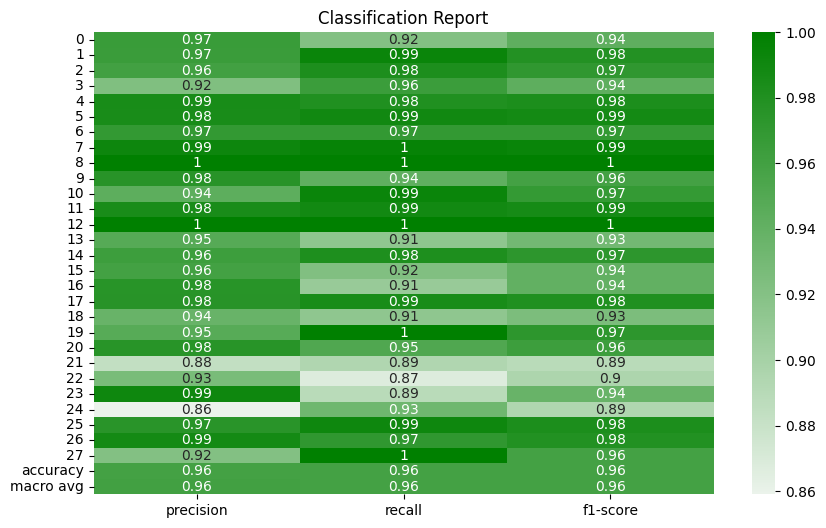

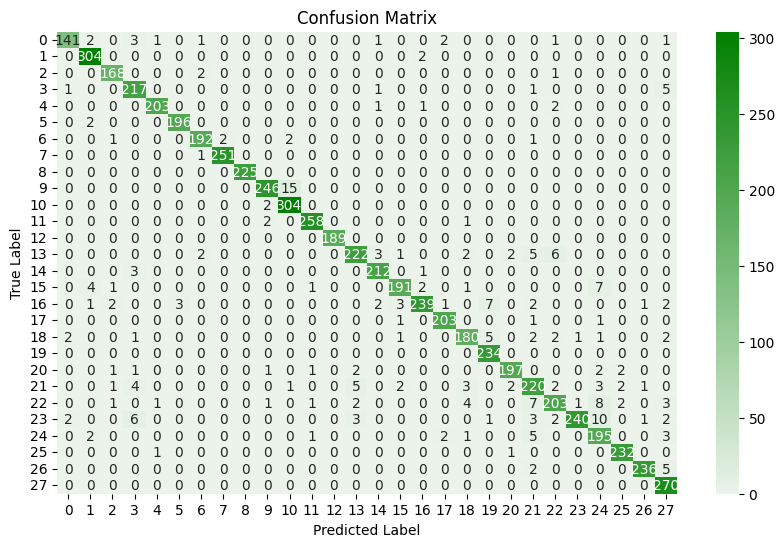

Accuracy: 0.9591043383610636


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy, precision, recall, and F1 score
accuracy = np.mean(ground_truth == predicted_labels)
report = classification_report(ground_truth, predicted_labels, output_dict=True)
conf_matrix = confusion_matrix(ground_truth, predicted_labels)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Define light color palettes
light_palette = sns.light_palette("green", as_cmap=True)

# Plot classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=light_palette)
plt.title('Classification Report')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=light_palette)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display accuracy
print("Accuracy:", accuracy)


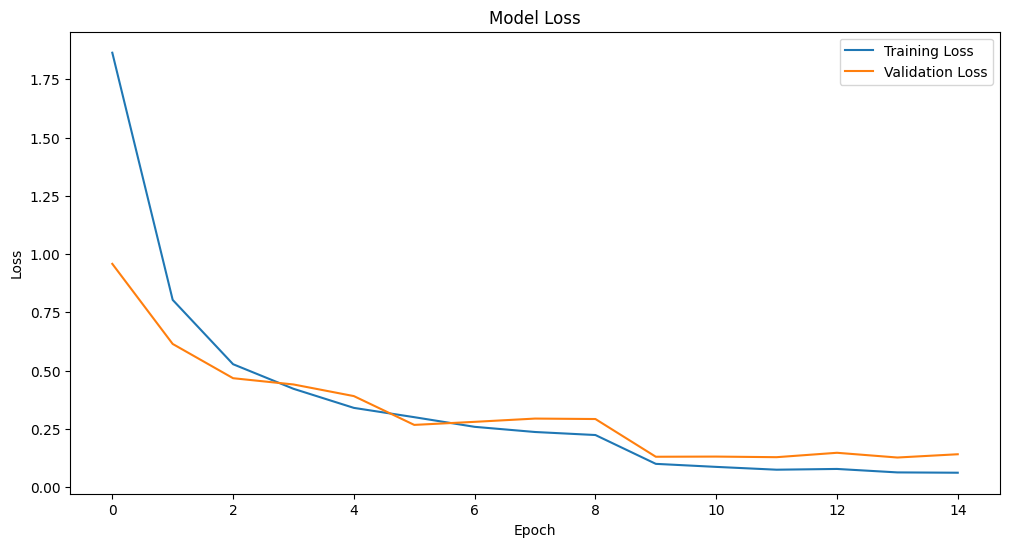

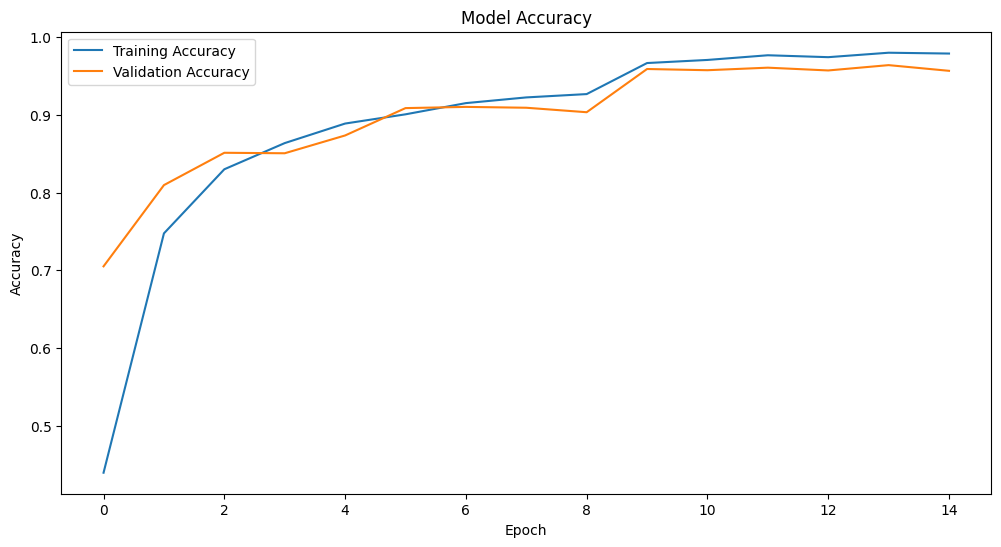

In [20]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(
    train_generator,#egitim verileri
    steps_per_epoch=None,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True
    )

Epoch 1/15
739/739 [==============================] - 910s 1s/step - loss: 1.8386 - accuracy: 0.4410 - val_loss: 0.8967 - val_accuracy: 0.7097 - lr: 0.0010
Epoch 2/15
739/739 [==============================] - 826s 1s/step - loss: 0.9123 - accuracy: 0.7035 - val_loss: 0.6631 - val_accuracy: 0.7851 - lr: 0.0010
Epoch 3/15
739/739 [==============================] - 795s 1s/step - loss: 0.6462 - accuracy: 0.7932 - val_loss: 0.5478 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 4/15
739/739 [==============================] - 835s 1s/step - loss: 0.4868 - accuracy: 0.8435 - val_loss: 0.4506 - val_accuracy: 0.8468 - lr: 0.0010
Epoch 5/15
739/739 [==============================] - 796s 1s/step - loss: 0.3844 - accuracy: 0.8754 - val_loss: 0.3977 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 6/15
739/739 [==============================] - 786s 1s/step - loss: 0.3300 - accuracy: 0.8919 - val_loss: 0.3151 - val_accuracy: 0.8940 - lr: 0.0010
Epoch 7/15
739/739 [==============================] - 807s 1s/st

In [11]:
training_accuracy = history1.history['accuracy']
validation_accuracy = history1.history['val_accuracy']

# Print the final accuracy
print("Training Accuracy:", training_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.9784090518951416
Validation Accuracy: 0.9628362655639648


In [12]:
# Save the custom CNN model
model.save("cnn_model_latest.h5")


c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from keras.models import load_model

# Load the custom CNN model
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_cnn=load_model("cnn_model_latest.h5")


1/1 [==============================] - 0s 355ms/step
Apple___Cedar_apple_rust


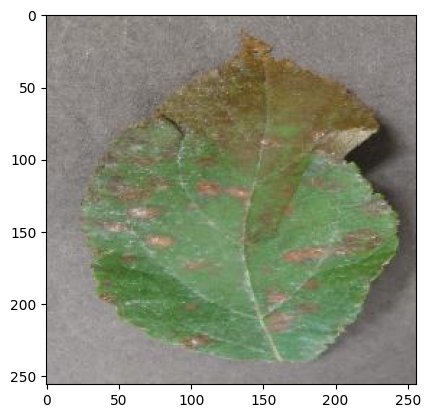

In [10]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\AppleCedarRust4.JPG'
result_cnn = model_cnn.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 43ms/step
Apple___Apple_scab


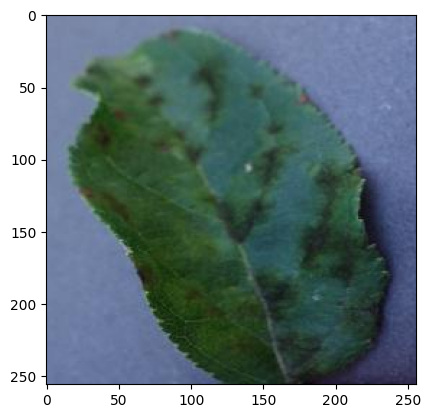

In [11]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\as.JPG'
result_cnn = model_cnn.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_cnn,axis=1)
print(classes[classresult[0]])

VGG16

In [12]:
def create_Base_model_from_VGG16():  
    model = VGG16(
        weights = "imagenet",
        include_top=False, 
        input_shape = (224,224, 3) # goruntu boyutu
        ) 
    for layer in model.layers:
      layer.trainable = False
    return model 
create_Base_model_from_VGG16().summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
def add_custom_layers():
    model = create_Base_model_from_VGG16()
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)   
    # creating the final model 
    final_model = tf.keras.models.Model(
        inputs = model.input, 
        outputs = predictions)
     
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return final_model

add_custom_layers().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model_from_vgg16 = add_custom_layers()
history2 = model_from_vgg16.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    use_multiprocessing=False,
    shuffle=True
    )

Epoch 1/15
739/739 [==============================] - 4551s 6s/step - loss: 0.7566 - accuracy: 0.7826 - val_loss: 0.4225 - val_accuracy: 0.8513 - lr: 0.0010
Epoch 2/15
739/739 [==============================] - 4435s 6s/step - loss: 0.2912 - accuracy: 0.9023 - val_loss: 0.4676 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 3/15
739/739 [==============================] - 4447s 6s/step - loss: 0.2201 - accuracy: 0.9239 - val_loss: 0.2929 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 4/15
739/739 [==============================] - 4410s 6s/step - loss: 0.1805 - accuracy: 0.9398 - val_loss: 0.2496 - val_accuracy: 0.9137 - lr: 0.0010
Epoch 5/15
739/739 [==============================] - 5003s 7s/step - loss: 0.1610 - accuracy: 0.9449 - val_loss: 0.2351 - val_accuracy: 0.9232 - lr: 0.0010
Epoch 6/15
739/739 [==============================] - 4305s 6s/step - loss: 0.1543 - accuracy: 0.9488 - val_loss: 0.2305 - val_accuracy: 0.9263 - lr: 0.0010
Epoch 7/15
739/739 [==============================] - 4298

In [15]:
model_from_vgg16.save('VGG16_model_latest.h5')

c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']

# Print the final accuracy
print("Training Accuracy:", training_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.9908979535102844
Validation Accuracy: 0.9556834101676941


In [17]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_vgg16=load_model('VGG16_model_latest.h5')

1/1 [==============================] - 0s 324ms/step
Tomato___Early_blight


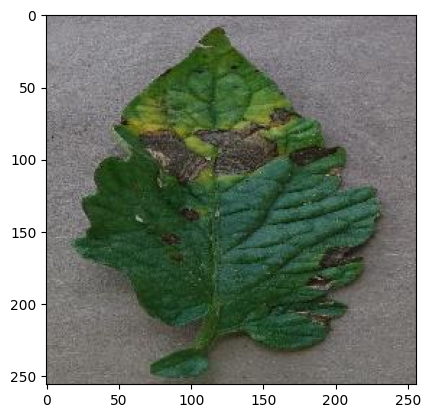

In [18]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\TomatoEarlyBlight4.JPG'
result_vgg16 = model_vgg16.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg16,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 155ms/step
Potato___healthy


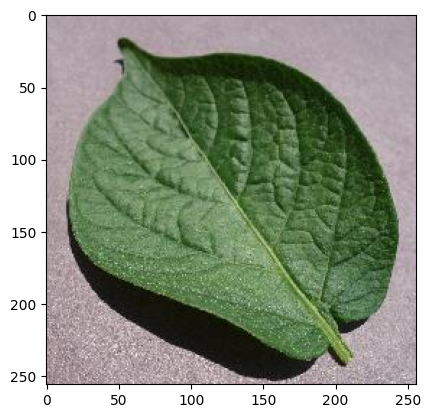

In [19]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\PotatoHealthy1.JPG'
result_vgg16 = model_vgg16.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg16,axis=1)
print(classes[classresult[0]])

VGG19

In [8]:
def create_Base_model_from_VGG19():  
    model_vgg19 = VGG19(
        weights = "imagenet",# control point from which model is started
        include_top=False, # to include/exclude the first 3 layers
        input_shape = (224,224, 3)) # image size
    # don't train existing weights 
    for layer in model_vgg19.layers:
      layer.trainable = False
    return model_vgg19 
create_Base_model_from_VGG19().summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
def add_custom_layers_vgg19():
    #Adding custom Layers 
    model_vgg19 = create_Base_model_from_VGG19()
    x = model_vgg19.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)   
    # creating the final model 
    final_model = tf.keras.models.Model(
        inputs = model_vgg19.input, 
        outputs = predictions)
     
    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return final_model

add_custom_layers_vgg19().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model_from_vgg19 = add_custom_layers_vgg19()
history3 = model_from_vgg19.fit(train_generator,
                      steps_per_epoch=None,
                      epochs=15,
                      validation_data=validation_generator,
                      validation_steps=None,
                      verbose=1,
                      callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
                      use_multiprocessing=False,
                      shuffle=True)

Epoch 1/15
739/739 [==============================] - 5639s 8s/step - loss: 0.9384 - accuracy: 0.7334 - val_loss: 0.4963 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 2/15
739/739 [==============================] - 6275s 8s/step - loss: 0.3612 - accuracy: 0.8799 - val_loss: 0.4414 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 3/15
739/739 [==============================] - 5378s 7s/step - loss: 0.2781 - accuracy: 0.9051 - val_loss: 0.3816 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 4/15
739/739 [==============================] - 5252s 7s/step - loss: 0.2328 - accuracy: 0.9211 - val_loss: 0.2804 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 5/15
739/739 [==============================] - 5407s 7s/step - loss: 0.2100 - accuracy: 0.9302 - val_loss: 0.2189 - val_accuracy: 0.9249 - lr: 0.0010
Epoch 6/15
739/739 [==============================] - 5224s 7s/step - loss: 0.1778 - accuracy: 0.9376 - val_loss: 0.3062 - val_accuracy: 0.8983 - lr: 0.0010
Epoch 7/15
739/739 [==============================] - 5285

In [12]:
model_from_vgg19.save('VGG19_model_latest.h5')

c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
training_accuracy = history3.history['accuracy']
validation_accuracy = history3.history['val_accuracy']

# Print the final accuracy
print("Training Accuracy:", training_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.989500880241394
Validation Accuracy: 0.9494635462760925


In [14]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_vgg19=load_model('VGG19_model_latest.h5')

1/1 [==============================] - 1s 689ms/step
Tomato___Bacterial_spot


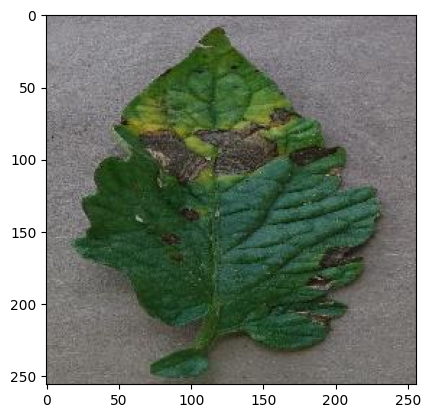

In [15]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\TomatoEarlyBlight4.JPG'
result_vgg16 = model_vgg19.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg16,axis=1)
print(classes[classresult[0]])

1/1 [==============================] - 0s 188ms/step
Potato___healthy


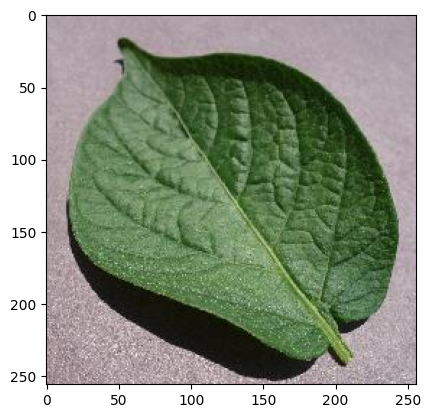

In [16]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\PotatoHealthy1.JPG'
result_vgg16 = model_vgg19.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg16,axis=1)
print(classes[classresult[0]])

In [18]:
from keras.applications.resnet import ResNet50

In [19]:
pretrained_model = ResNet50(
    input_shape=(224,224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [20]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
my_callbacks  = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=3,mode='auto')

In [24]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=my_callbacks,
    verbose=1,
    steps_per_epoch=None,
    validation_steps=4
)

Epoch 1/15
739/739 [==============================] - 2004s 3s/step - loss: 3.1011 - accuracy: 0.1033 - val_loss: 2.8383 - val_accuracy: 0.1797
Epoch 2/15
739/739 [==============================] - 2028s 3s/step - loss: 2.6170 - accuracy: 0.2204 - val_loss: 2.4649 - val_accuracy: 0.2500
Epoch 3/15
739/739 [==============================] - 1986s 3s/step - loss: 2.2890 - accuracy: 0.3001 - val_loss: 2.3161 - val_accuracy: 0.2734
Epoch 4/15
739/739 [==============================] - 1943s 3s/step - loss: 2.1106 - accuracy: 0.3514 - val_loss: 1.9484 - val_accuracy: 0.4297
Epoch 5/15
739/739 [==============================] - 2100s 3s/step - loss: 2.0036 - accuracy: 0.3817 - val_loss: 1.9375 - val_accuracy: 0.3672
Epoch 6/15
739/739 [==============================] - 2693s 4s/step - loss: 1.9304 - accuracy: 0.3967 - val_loss: 2.0090 - val_accuracy: 0.3438
Epoch 7/15
739/739 [==============================] - 2011s 3s/step - loss: 1.8747 - accuracy: 0.4112 - val_loss: 1.9222 - val_accuracy:

In [25]:
model.save('Resnet50_model_latest.h5')

c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Print the final accuracy
print("Training Accuracy:", training_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.49024173617362976
Validation Accuracy: 0.4453125


In [27]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_resnet50=load_model('Resnet50_model_latest.h5')

1/1 [==============================] - 0s 132ms/step
Potato___healthy


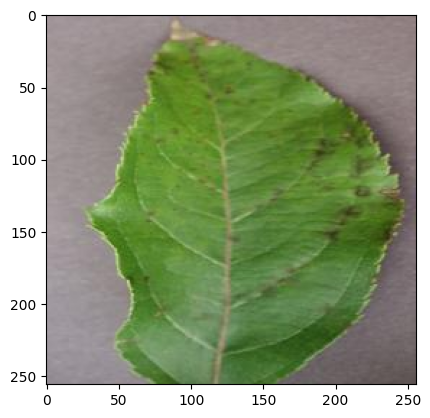

In [33]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r"C:\Users\91630\Desktop\archive (6)\test\test\AppleScab1.JPG"
result_resnet50= model.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_vgg16,axis=1)
print(classes[classresult[0]])

Alexnet

In [2]:
from tensorflow import keras
from keras.models import Sequential
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adamax


In [9]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [10]:
# Initializing the CNN
model = Sequential()
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Convolution Step 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Flattening Step
model.add(Flatten())
# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = num_classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                        

In [11]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 6431 images belonging to 28 classes.


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(    
    train_generator,
    steps_per_epoch=None,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/15
739/739 [==============================] - 1916s 3s/step - loss: 2.4933 - accuracy: 0.3134 - val_loss: 3.4899 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/15
739/739 [==============================] - 1948s 3s/step - loss: 1.4643 - accuracy: 0.5529 - val_loss: 3.5085 - val_accuracy: 0.2656 - lr: 0.0010
Epoch 3/15
739/739 [==============================] - 1797s 2s/step - loss: 1.0666 - accuracy: 0.6628 - val_loss: 2.4057 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 4/15
739/739 [==============================] - 1695s 2s/step - loss: 0.8365 - accuracy: 0.7352 - val_loss: 1.4217 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 5/15
739/739 [==============================] - 1741s 2s/step - loss: 0.6967 - accuracy: 0.7771 - val_loss: 0.8096 - val_accuracy: 0.7422 - lr: 0.0010
Epoch 6/15
739/739 [==============================] - 1682s 2s/step - loss: 0.5931 - accuracy: 0.8119 - val_loss: 0.9309 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 7/15
739/739 [==============================] - 1651

In [21]:
model.save('alexnet_model_latest.h5')

c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Print the final accuracy
print("Training Accuracy:", training_accuracy[-1])
print("Validation Accuracy:", validation_accuracy[-1])

Training Accuracy: 0.9474196434020996
Validation Accuracy: 0.8828125


In [16]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_alexnet=load_model('alexnet_model_latest.h5')

1/1 [==============================] - 0s 252ms/step
Potato___healthy


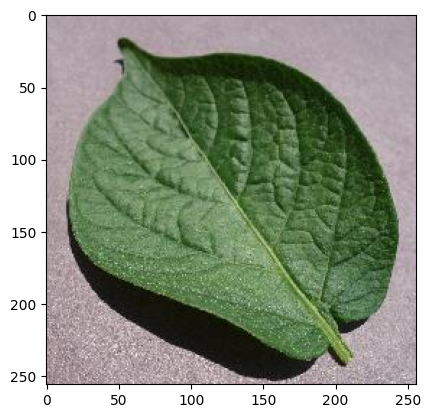

In [17]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'C:\Users\91630\Desktop\archive (6)\test\test\PotatoHealthy1.JPG'
result_alexnet = model_alexnet.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_alexnet,axis=1)
print(classes[classresult[0]])

InceptionV3